# 3주차 세션
### 03/09 1조 실습

* 실습에 사용하는 데이터 : abalone
* 데이터 출처 https://realpython.com/knn-python/

## **3-1 k-최근접 이웃 회귀**
abalone의 length를 기준으로 k-최근접 이웃 회귀 기법을 활용해 diameter 예측


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#자료 불러오기
url = (
    """https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"""
 )
abalone = pd.read_csv(url, header=None)

abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


colum이 숫자로 돼 있기 때문에 column에 이름 부여<br>
sex 열은 고려하지 않으므로 삭제<br><br>
inplace=True로 해도 되고
아래처럼 그냥 abalone 자체가 새로운 데이터프레임을 참조하도록 해줘도 됨

In [2]:
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight",
"Shucked weight","Viscera weight","Shell weight","Rings"]
abalone = abalone.drop("Sex", axis = 1)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### DBSCAN을 활용해 이상치를 탐지하기


In [5]:
# DBSCAN을 활용한 이상치 탐지
# sklearn.cluster 라이브러리에서 DBSCAN을 import
# eps = 0.2, min_samples = 10으로 설정
# eps: 반지름, min_samples: 반경 내 최소 샘플 수

from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.2, min_samples = 10)
pred_db = model.fit_predict(abalone)

pd.Series(pred_db).value_counts()

 2     685
 3     626
 4     565
 8     481
 1     390
 14    252
 9     240
 11    195
-1     163
 7     117
 12    113
 0     100
 13     57
 5      54
 16     47
 6      19
 10     17
 15     15
 17     15
 19     14
 18     12
dtype: int64

In [6]:
# 이상치 개수
print('DBSCAN이 탐지한 이상치 개수 :', (pred_db == -1).sum())

DBSCAN이 탐지한 이상치 개수 : 163


### 1) pred_db 값이 -1인 열의 인덱스를 찾은 후, ablaone에서 해당 인덱스에 해당하는 행들을 제거해 abalone_removed에 저장하세요

In [10]:
#방법1
# 이상치 인덱스 저장하기
# pred_db 값이 -1인 인덱스를 찾아서 index_remove에 저장하세요
# np.where : 조건에 맞는 인덱스 찾기

index_remove = np.where(pred_db == -1)

# 이상치 인덱스를 활용해 이상치 제거

abalone_removed = abalone.drop(index_remove[0])
print('이상치 제거 전 관측치 수 :', len(abalone))
print('이상치 제거 후 관측치 수 :', len(abalone_removed))

이상치 제거 전 관측치 수 : 4177
이상치 제거 후 관측치 수 : 4014


In [11]:
index_remove

(array([   6,   33,   81,   83,  128,  129,  163,  164,  165,  166,  167,
         168,  169,  170,  181,  232,  236,  270,  275,  277,  278,  294,
         310,  312,  313,  314,  334,  351,  355,  357,  358,  359,  362,
         369,  371,  372,  375,  428,  433,  450,  468,  469,  478,  480,
         501,  530,  542,  570,  582,  593,  613,  621,  628,  660,  664,
         673,  674,  675,  678,  699,  719,  744,  746,  754,  811,  860,
         882,  891, 1039, 1044, 1051, 1052, 1145, 1193, 1207, 1209, 1210,
        1216, 1416, 1417, 1419, 1426, 1427, 1428, 1528, 1754, 1755, 1756,
        1762, 1763, 1812, 1821, 1985, 2051, 2090, 2101, 2108, 2151, 2157,
        2160, 2161, 2180, 2183, 2199, 2201, 2209, 2210, 2265, 2274, 2305,
        2334, 2335, 2344, 2345, 2353, 2366, 2368, 2390, 2402, 2416, 2418,
        2436, 2538, 2542, 2619, 2623, 2624, 2625, 2627, 2810, 2811, 2862,
        2863, 2972, 3007, 3008, 3081, 3148, 3149, 3151, 3188, 3244, 3274,
        3280, 3316, 3319, 3372, 3392, 

In [12]:
#방법2

abalone_removed = abalone[pred_db!=-1]
print('이상치 제거 전 관측치 수 :', len(abalone))
print('이상치 제거 후 관측치 수 :', len(abalone_removed))

이상치 제거 전 관측치 수 : 4177
이상치 제거 후 관측치 수 : 4014


length 와 diameter의 상관계를 보기 위해 scatterplot 활용

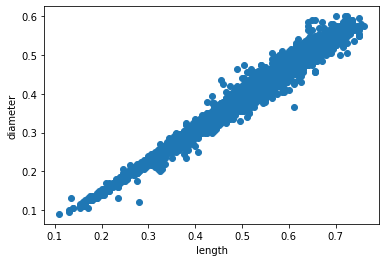

In [13]:
x = abalone_removed["Length"]
y = abalone_removed["Diameter"]

plt.scatter(x,y)
plt.xlabel("length")
plt.ylabel("diameter")
plt.show()

### 2) train_test_split을 활용해 train set과 test set으로 나누세요<br>
독립변수는 Length, 종속변수는 Diameter, test_size = 0.2, random_state = 5<br>

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, train_target =\
    train_test_split(abalone_removed['Length'], abalone_removed['Diameter'], test_size = 0.2, random_state = 5)

print(train_input.shape, test_input.shape)

(3211,) (803,)


### 3) train_input과 test_input을 2차원의 형태로 만들어서 train_input과 test_input의 shape 출력하세요

KNeighborRegressor에 넣어주려면 배열의 크기를 2차원으로 바꿔줘야 함.<br><br>
책에서는 reshape(-1,1)을 썼지만, 아래처럼 np.newaxis를 활용한 슬라이싱 표현을 써주면,
<br>
1d array를 row vector나 column vector의 형태로 바꿀 수 있음.
<br>
np.newaxis가 1의 역할을 하게 됨.
<br>
(reshape vs np.newaxis -> https://azanewta.tistory.com/3)
<br><br>
1차원에 크기 (3132,) -> 2차원에 크기 (3132, 1)

In [20]:
print(train_input.shape, test_input.shape)

train_input = np.array(train_input)[:,np.newaxis]
test_input = np.array(test_input)[:,np.newaxis]

print(train_input.shape, test_input.shape)

(3211,) (803,)
(3211, 1) (803, 1)


아니면 처음부터 abalone[["Length"]]를 활용해 추출해도 된다

In [21]:
train_input, test_input,train_target,test_target =\
    train_test_split(abalone[["Length"]], abalone[["Diameter"]],
                    random_state = 5, test_size = 0.2)

print(train_input.shape, test_input.shape)

(3341, 1) (836, 1)


test set의 20%를 validation set으로 따로 분리해서 최적의 n값을 구하는 데 사용

In [22]:
valid_size = int(len(train_input) * 0.2)

valid_input = train_input[:valid_size]
valid_target = train_target[:valid_size]

train_input = train_input[valid_size:]
train_target = train_target[valid_size:]

#방법2를 사용했을 경우, 아래처럼 해도 됨
#test_input = test_input.drop(valid_input.index)
#test_target = test_target.drop(valid_target.index)

In [23]:
print(train_input.shape, valid_input.shape)

(2673, 1) (668, 1)


### 4) KNeighborsRegressor 객체를 생성해 knr에 저장하세요<br>
 knr에서 weights는 "distance"로, p는 2로 변경<br>
 train set을 활용해 훈련시킨 후, <br>
 knr.score() 매서드를 통해 결정계수 R^2을 구해서 출력하세요.


In [25]:
from sklearn.neighbors import KNeighborsRegressor

#metics 라이브러리의 r2_score 매서드를 활용해도 됩니다!
from sklearn.metrics import r2_score

knr = KNeighborsRegressor()
knr.weights = 'distance'
knr.p = 2

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input,test_target))
print("r2_score of train set :", r2_score(train_target, knr.predict(train_input)))
print("r2_score of test set  :", r2_score(test_target, knr.predict(test_input)))

0.9694802283580433
0.9759932299685116
r2_score of train set : 0.9694802283580433
r2_score of test set  : 0.9759932299685116


n_neighbors의 값을 조정해보면서 valid set의 R^2가 가장 높은 값 찾기<br>
n_neighbors 값 조정할 때 다시 train set으로 train 시키지 않아도 됨!<br>
데이터가 많아서 아마 37 정도가 괜찮은 듯

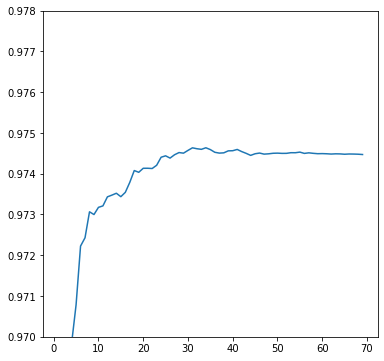

maximum score : 0.9746364669547422
maximum n_neighbors value : 34


In [27]:
v_lst = []
for i in range(1,70):
    knr.n_neighbors = i
    # knr.fit(train_input,train_target)
    v_score = knr.score(valid_input, valid_target)
    v_lst.append(v_score)
    
plt.figure(figsize = (6,6))
plt.plot(range(1,70), v_lst)
plt.ylim(0.97,0.978)
plt.show()
print(f"maximum score : {max(v_lst)}")
print(f"maximum n_neighbors value : {v_lst.index(max(v_lst)) + 1}" )

mae와 mse구해보기

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#mae 구하기
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(f"mae = {mae}")
#mse 구하기
mse = mean_squared_error(test_target,test_prediction)
print(f"mse = {mse}")


## 3-2 선형회귀
length를 활용해 Whole weight를 예측해보기

length와 Whole weight 간의 경향성 파악

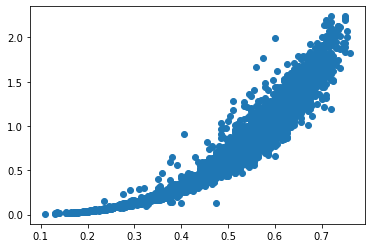

In [28]:
x = abalone_removed["Length"]
y = abalone_removed["Whole weight"]
plt.scatter(x,y)
plt.show()

### 1) abalone_removed에서 독립변수는 "Length", 종속변수는 "Whole weight"를 추출해서
### train set, test set을 나눈 뒤(random_state = 5)
### 2차원으로 바꿔서 train_input과 test_input에 저장하세요

In [32]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
    train_test_split(abalone_removed['Length'], abalone_removed['Whole weight'], random_state = 5)

train_input = np.array(train_input)[:, np.newaxis]
test_input = np.array(test_input)[:, np.newaxis]

KNeighborsRegressr을 활용해<br>
length가 0.8일 때와 1.5일 때 값을 비교

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.predict([[0.8]]))
print(knr.predict([[1.5]]))

[1.9268]
[1.9268]


### 2) LinearRegression()객체를 생성해 lr에 저장하고,<br>
### train set으로 학습시킨 후,<br>
### train set과 test set에 대한 스코어를 train_score와 test_socre에 저장하세요

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print("length=0.8 ->",lr.predict([[0.8]]))
print("length=1.5 ->",lr.predict([[1.5]]))
print()

train_score = lr.score(train_input, train_target)
test_score = lr.score(test_input, test_target)

print(f"train_score : {train_score.round(3)}")
print(f"test_score  : {test_score.round(3)}")
print()

print(lr.coef_, lr.intercept_)

length=0.8 -> [1.82295032]
length=1.5 -> [4.38420097]

train_score : 0.875
test_score  : 0.855

[3.6589295] -1.104193283177911


흠... 그런데 스코어가 좋지 않다? -> 자료가 완전 직선이 아니구나!

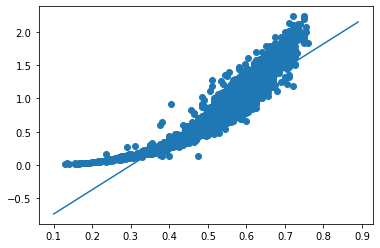

In [35]:
point = np.arange(0.1,0.9,0.01)
plt.scatter(train_input,train_target)
plt.plot(point, lr.predict(point.reshape(-1,1)))
# plt.plot(point, lr.coef_*point + lr.intercept_)

plt.show()

### 3) 다항회귀를 활용해 문제 해결해보자<br>
열벡터 train_input**2과 train_input을 만든 뒤 
train_poly에 2차원 형식으로 저장하세요

열벡터 test_input**2과 test_input을 만든 뒤 
test_poly에 2차원 형식으로 저장하세요

<br><br>
교재에는 np.column_stack()이지만 np.hstack()도 가능

In [38]:
train_poly = np.hstack((train_input**2, train_input))
test_poly = np.hstack((test_input**2, test_input))

train_poly

array([[0.3969  , 0.63    ],
       [0.1296  , 0.36    ],
       [0.3721  , 0.61    ],
       ...,
       [0.455625, 0.675   ],
       [0.0324  , 0.18    ],
       [0.354025, 0.595   ]])

### 4) LinearRegression()객체를 생성해 lr에 저장하고,<br>
### train_poly와 train_target을 활용해 학습시킨 후,<br>
### train_poly와 test_poly에 대한 스코어를 poly_train_score와 poly_test_socre에 저장하세요

In [39]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

poly_train_score = lr.score(train_poly, train_target)

poly_test_score = lr.score(test_poly, test_target)

print(lr.coef_, lr.intercept_)

print(f"train score vs poly train score : \
{train_score.round(3)} vs {poly_train_score.round(3)}")

print(f"test score  vs poly test score  : \
{test_score.round(3)} vs {poly_test_score.round(3)}")

#스코어가 확실히 상승한 걸 알 수 있다!!

[ 6.6059924  -2.73049606] 0.34319822936749333
train score vs poly train score : 0.875 vs 0.935
test score  vs poly test score  : 0.855 vs 0.933


그래프로 표현하기

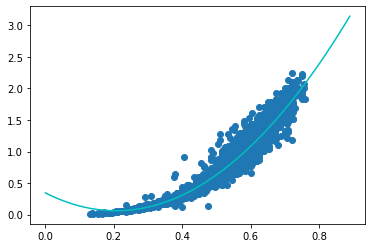

In [40]:
point = np.arange(0,0.9,0.01)
point_poly = np.column_stack((point**2,point))

plt.scatter(train_input, train_target)
plt.plot(point, lr.predict( point_poly ), c ="c")
# plt.plot(point,7.25*point**2 - 3.26*point + 0.44, c ="c")

plt.show()



### + 경사하강법

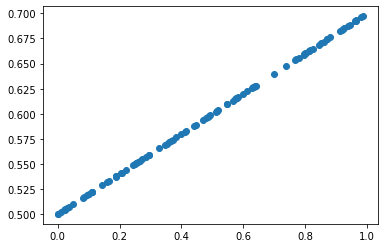

In [41]:
np.random.seed(5)
X = np.random.rand(100)
Y = 0.2*X +0.5

plt.scatter(X,Y)
plt.show()


0


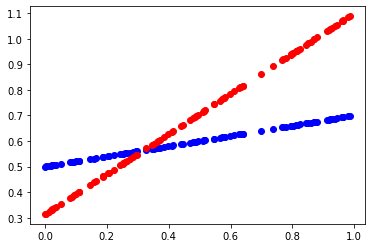

5


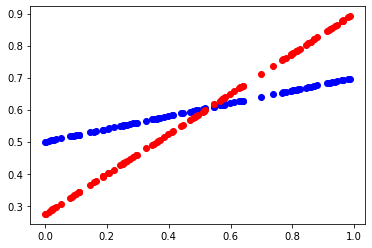

10


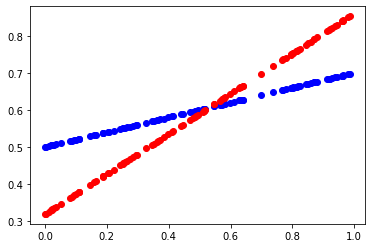

15


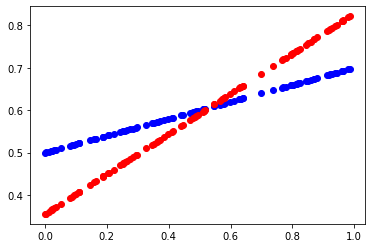

20


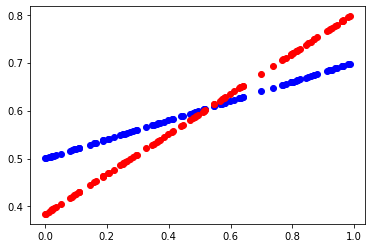

25


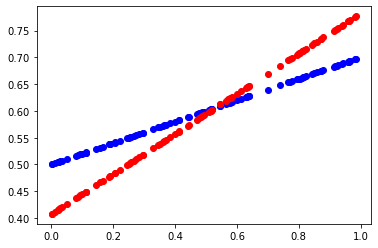

30


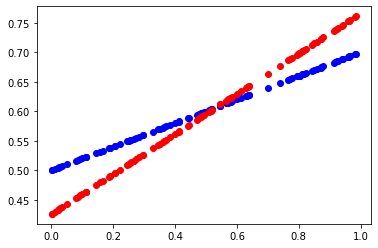

35


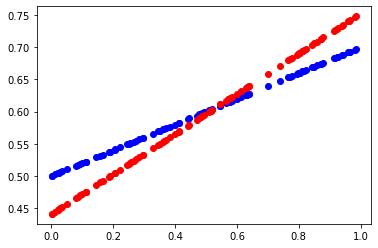

40


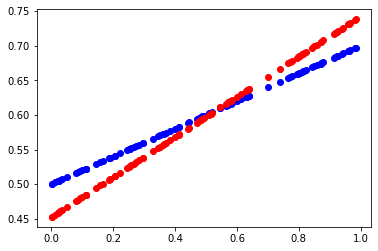

45


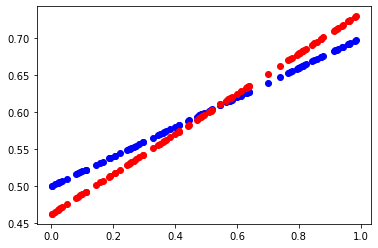

50


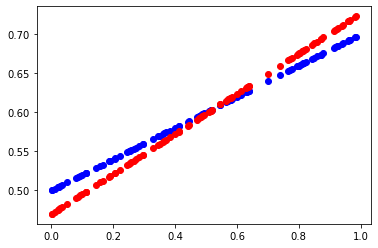

55


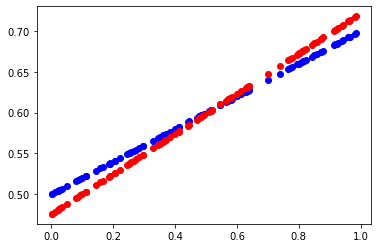

60


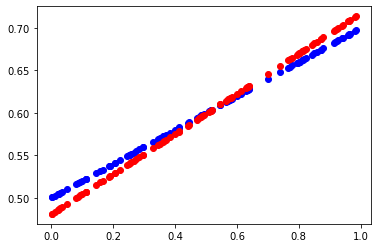

65


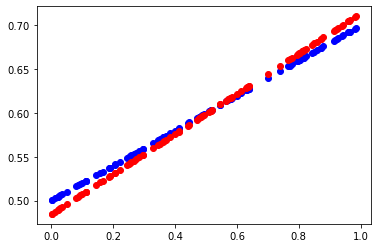

70


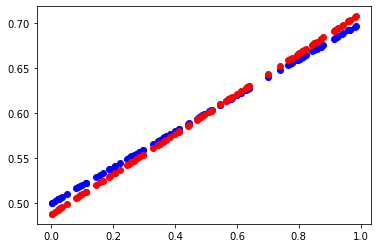

75


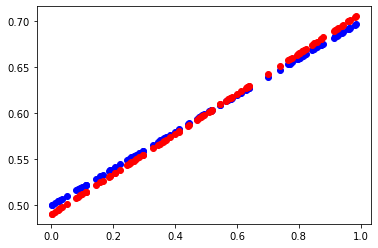

80


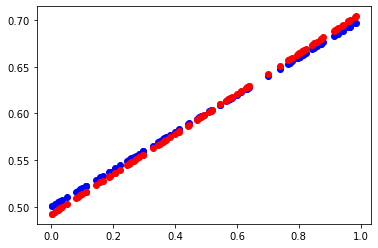

85


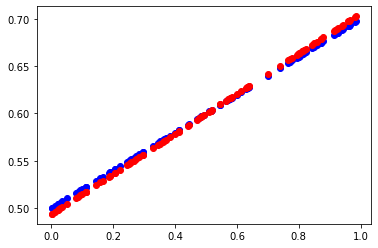

In [42]:
from sklearn.metrics import mean_squared_error

#그래프를 그리는 함수
def plot_prediction(pred, Y):
    plt.figure()
    plt.scatter(X,Y, c = "b")
    plt.scatter(X,pred, c = "r")
    plt.show()

# Y_Hat = W * X + b에서 랜덤하게 W,b 값을 설정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.6 #임의로 지정

for epoch in range(100): # 100번 반복 학습
    Y_pred = W*X + b #Y의 예측값
    
    error = mean_squared_error(Y_pred, Y)
# 비용함수로 mse이용
# error = (Y_pred - Y)**2.mean()
# error = (Y_pred - Y)**2.sum() / len(Y)

    #오차가 아주 작은 값이 되면 갱신을 멈춤
    if error < 0.00001: 
        break
    
    #gradien_descent 계산
    w_grad = learning_rate * ((Y_pred-Y)*X).mean()
    b_grad = learning_rate * (Y_pred-Y).mean()
    
    #W, b 값 갱신
    W = W - w_grad
    b = b - b_grad
    
    #실측값과 예측값이 얼마나 근사해지는 지 표현
    # epoch % 5 == 0이 될 때마다 그래프 그림
    if epoch % 5 == 0:
        Y_pred = W*X + b
        print(epoch)
        plot_prediction(Y_pred, Y)
    
